# Analisis Performa Metode Naive Bayes dan Artificial Neural Networks dalam Deteksi Dini Kanker Serviks

Kelompok ???
- Muhammad Syaifudin Zuhri
- Adzin Naufal
- ???
- [ACHMAD RIDHO FA'IZ](https://rhindottire.github.io/Data-Mining/intro.html) (230411100197)

## Introduction

### Naive Bayes

![Naive Bayes](KK/img/naive-bayes.png)

**Naive Bayes** adalah algoritma klasifikasi probabilistik yang didasarkan pada `teorema Bayes` dengan asumsi bahwa setiap fitur dalam data saling independen satu sama lain, diberikan kelas tertentu. Asumsi independensi ini, meskipun sering kali tidak realistis, membuat algoritma ini sederhana, cepat, dan efektif untuk berbagai aplikasi, terutama dalam klasifikasi teks dan diagnosis medis.

- **Definisi**: Naive Bayes adalah algoritma klasifikasi berbasis probabilitas yang menggunakan teorema Bayes dengan asumsi bahwa fitur-fitur dalam data saling independen. Meskipun asumsi ini sederhana, algoritma ini sering kali efektif untuk berbagai tugas klasifikasi.
- **Cara Kerja**: Algoritma ini menghitung probabilitas setiap kelas berdasarkan fitur-fitur yang diberikan, lalu memilih kelas dengan probabilitas tertinggi. Ini dilakukan dengan menggabungkan probabilitas prior (berdasarkan frekuensi kelas) dan likelihood (probabilitas fitur diberikan kelas).
    - **Langkah 1**: Hitung probabilitas awal (prior) untuk setiap kelas, misalnya, persentase kasus biopsi positif (1) dan negatif (0).
    - **Langkah 2**: Hitung probabilitas fitur (likelihood) untuk setiap kelas, seperti probabilitas usia "Muda" pada kasus biopsi positif.
    - **Langkah 3**: Kombinasikan prior dan likelihood untuk menghitung probabilitas posterior, lalu pilih kelas dengan nilai tertinggi.
    - **Langkah 4**: Untuk data baru, gunakan probabilitas ini untuk memprediksi kelas.
- **Aplikasi**: Digunakan dalam klasifikasi teks (misalnya, filter spam email), analisis sentimen, dan diagnosis medis, seperti memprediksi hasil biopsi berdasarkan data kesehatan.
- **Kelebihan dan Kekurangan**: Naive Bayes cepat dan efisien untuk data berdimensi tinggi, tetapi asumsi independensi fitur dapat membatasi akurasi jika fitur-fitur saling berkorelasi.

#### Dasar Matematis: Teorema Bayes

$$
P(C_k | x) = \frac{P(C_k) \cdot P(x | C_k)}{P(x)}
$$

Di mana:
- $ C_k $: Kelas ke-$ k $ (misalnya, Biopsy=1 atau Biopsy=0).
- $ x $: Vektor fitur (misalnya, Age, Number of sexual partners, dll.).
- $ P(C_k | x) $: Probabilitas posterior, yaitu probabilitas kelas $ C_k $ diberikan fitur $ x $.
- $ P(C_k) $: Probabilitas prior, yaitu probabilitas kelas $ C_k $ sebelum melihat data.
- $ P(x | C_k) $: Probabilitas likelihood, yaitu probabilitas fitur $ x $ diberikan kelas $ C_k $.
- $ P(x) $: Probabilitas evidence, yaitu probabilitas fitur $ x $ secara keseluruhan.

Karena $ P(x) $ konstan untuk semua kelas, kita dapat menyederhanakan perbandingan probabilitas posterior menjadi:

$$
\hat{y} = \arg\max_{k} P(C_k) \cdot P(x | C_k)
$$

#### Asumsi Independensi

Asumsi utama Naive Bayes adalah bahwa fitur-fitur saling independen diberikan kelas. Dengan demikian, likelihood dapat dihitung sebagai:

$$
P(x | C_k) = \prod_{i=1}^{n} P(x_i | C_k)
$$

Di mana:
- $ x_i $: Fitur ke-$ i $.
- $ n $: Jumlah fitur.
- $ P(x_i | C_k) $: Probabilitas fitur ke-$ i $ diberikan kelas $ C_k $.

Untuk menghindari underflow (karena perkalian banyak probabilitas kecil dapat menghasilkan nilai yang sangat kecil), sering kali digunakan logaritma:

$$
\log P(x | C_k) = \sum_{i=1}^{n} \log P(x_i | C_k)
$$

#### Perhitungan Probabilitas

- **Prior Probability ($ P(C_k) $)**: Dihitung sebagai frekuensi relatif kelas dalam data pelatihan. Misalnya, dalam file Anda:
  - $ P(\text{Biopsy=1}) = 0.125 $ (12.5% kasus positif).
  - $ P(\text{Biopsy=0}) = 0.875 $ (87.5% kasus negatif).
- **Likelihood ($ P(x_i | C_k) $)**: Tergantung pada jenis fitur:
  - **Fitur Kategorikal**: Dihitung sebagai frekuensi relatif. Misalnya, dalam file Anda:
    - $ P(\text{Age='Muda'} | \text{Biopsy=1}) = 0.25 $.
    - $ P(\text{Age='Muda'} | \text{Biopsy=0}) = 0.3 $.
  - **Fitur Kontinu**: Sering diasumsikan mengikuti distribusi Gaussian:

    $$
    P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_{k,i}^2}} \exp\left( -\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2} \right)
    $$

    Di mana $ \mu_{k,i} $ adalah rata-rata dan $ \sigma_{k,i} $ adalah standar deviasi fitur $ i $ dalam kelas $ k $. Dalam file Anda, fitur numerik diubah menjadi kategorikal, sehingga perhitungan Gaussian tidak digunakan.

#### Penanganan Probabilitas Nol

Jika sebuah fitur tidak muncul dalam data pelatihan untuk suatu kelas, probabilitasnya akan menjadi nol, yang dapat menyebabkan $ P(x | C_k) = 0 $. Untuk mengatasi ini, digunakan teknik **smoothing**, seperti **Laplace smoothing**:

$$
P(x_i | C_k) = \frac{\text{count}(x_i, C_k) + 1}{\text{total count}(C_k) + \text{jumlah kategori}}
$$

Ini memastikan bahwa tidak ada probabilitas yang bernilai nol.

#### Advantages and Disadvantages

**Kelebihan**:
- Cepat dan efisien untuk data berdimensi tinggi.
- Mudah diimplementasikan dan diinterpretasikan.
- Berkinerja baik pada data kategorikal.
- Membutuhkan sedikit data pelatihan dibandingkan model kompleks.

**Kekurangan**:
- Asumsi independensi fitur sering kali tidak realistis, yang dapat menurunkan akurasi jika fitur berkorelasi.
- Dapat dikalahkan oleh model seperti regresi logistik atau ANN dalam kasus kompleks [Naive Bayes Classifier - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).
- Memerlukan penanganan probabilitas nol dengan teknik seperti Laplace smoothing.
- **Likelihood**: Probabilitas fitur diberikan kelas.

#### Naive Bayes Variants and App

Naive Bayes memiliki beberapa varian yang disesuaikan dengan jenis data:
- **Multinomial Naive Bayes**: Digunakan untuk data diskret, seperti jumlah kemunculan kata dalam klasifikasi teks. Cocok untuk fitur dengan frekuensi atau hitungan.
- **Bernoulli Naive Bayes**: Digunakan untuk data biner (hadir/tidak hadir), seperti keberadaan kata dalam dokumen.
- **Gaussian Naive Bayes**: Digunakan untuk data kontinu dengan asumsi distribusi Gaussian.

**Konsep Terkait**:
- **Teorema Bayes**: Dasar matematis untuk menghitung probabilitas bersyarat.
- **Probabilitas Bersyarat**: Probabilitas suatu peristiwa diberikan peristiwa lain telah terjadi.
- **Asumsi Independensi**: Asumsi bahwa fitur tidak saling memengaruhi, yang membuat Naive Bayes sederhana.
- **Smoothing**: Teknik seperti Laplace smoothing untuk menghindari probabilitas nol.
- **Prior dan Posterior**: Probabilitas sebelum dan setelah melihat data.

Naive Bayes sering digunakan dalam:
- **Filter Spam**: Mengklasifikasikan email sebagai spam atau bukan berdasarkan kata-kata yang ada [Naive Bayes Classifier Explained](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/).
- **Analisis Sentimen**: Menentukan apakah ulasan positif atau negatif berdasarkan kata-kata [Performing Sentiment Analysis](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/).
- **Diagnosis Medis**: Memprediksi penyakit, seperti dalam file Anda untuk hasil biopsi [Naïve Bayes Algorithm](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html).
- **Klasifikasi Dokumen**: Mengkategorikan dokumen ke dalam topik tertentu [Naive Bayes Classifier](https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier).

#### **Key Citations**:

- [Naive Bayes Classifiers - GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/naive-bayes-classifiers/)
- [Naive Bayes Classifier - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [Naive Bayes Classifier Explained With Practical Problems](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)
- [What Are Naïve Bayes Classifiers? | IBM](https://www.ibm.com/think/topics/naive-bayes)
- [Naive Bayes Classifier in Machine Learning - Javatpoint](https://www.javatpoint.com/machine-learning-naive-bayes-classifier)
- [Naive Bayes Classifier | Simplilearn](https://www.simplilearn.com/tutorials/machine-learning-tutorial/naive-bayes-classifier)
- [Naïve Bayes Algorithm: Everything You Need to Know](https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html)
- [Naive Bayes Algorithm in ML: Simplifying Classification](https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners)
- [Naive Bayes Classifier Tutorial: with Python Scikit-learn](https://www.datacamp.com/tutorial/naive-bayes-scikit-learn)
- [A Simple Explanation of Naive Bayes Classification](https://stackoverflow.com/questions/10059594/a-simple-explanation-of-naive-bayes-classification)

### Artificial Neural Network

![Artificial Neural Network (ANN)](KK/img/ANN.png)

#### Basic Concept

**Artificial Neural Network** (ANN) adalah model komputasi yang terinspirasi dari struktur dan fungsi jaringan saraf biologis, seperti yang ada pada otak manusia. ANN terdiri dari sekumpulan `node` (neuron) yang saling terhubung dan disusun dalam lapisan, yaitu lapisan input, lapisan tersembunyi (hidden layer), dan lapisan output. Setiap neuron menerima input, mengolahnya dengan bobot (weight) dan bias, lalu menerapkan fungsi aktivasi untuk menghasilkan output. ANN digunakan untuk memodelkan pola-pola kompleks dalam data, seperti dalam klasifikasi, regresi, atau pengenalan pola, dan sering diterapkan dalam bidang seperti pengenalan gambar, pemrosesan bahasa alami (NLP), dan diagnosis medis.

#### Forward and Backpropagation Process

##### Forward Propagation

Forward propagation adalah langkah pertama dalam menggunakan ANN untuk membuat prediksi, Data masukan dilewatkan melalui jaringan untuk menghasilkan prediksi, menggunakan bobot dan fungsi aktivasi seperti sigmoid. Proses ini melibatkan:
- Setiap neuron dalam lapisan tersembunyi menghitung outputnya dengan rumus:

  $$
  \text{output} = \sigma\left( \sum_{i} w_i \cdot x_i + b \right)
  $$

  Di mana:
  - $ w_i $ adalah bobot untuk input ke-i.
  - $ x_i $ adalah nilai input ke-i.
  - $ b $ adalah bias.
  - $ \sigma $ adalah fungsi aktivasi, dalam kasus ini kemungkinan sigmoid, karena output H1 dan H2 mendekati 0 atau 1, dengan rumus:

    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$

- Output dari lapisan tersembunyi kemudian digunakan sebagai input untuk lapisan output, menghasilkan prediksi akhir (Prediksi_Final).

Dalam file Anda, contohnya untuk baris pertama data (Age=18, Number of sexual partners=4, dll.), output H1 adalah 0.9999995477 dan H2 adalah 0.9999999327, yang kemudian menghasilkan Prediksi_Final = 0.4240051204.

##### Backpropagation

Backpropagation adalah algoritma untuk melatih ANN dengan menyesuaikan bobot dan bias agar prediksi menjadi lebih akurat, Kesalahan prediksi dihitung (misalnya, dengan MSE), lalu gradien dihitung untuk menyesuaikan bobot, menggunakan learning rate untuk mengontrol perubahan.  
Langkah-langkahnya adalah:
- **Forward Pass**: Hitung output jaringan untuk input yang diberikan.
- **Hitung Loss**: Bandingkan output prediksi dengan nilai target (misalnya, Biopsy) untuk menghitung kesalahan, loss dihitung menggunakan Mean Squared Error (MSE):

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Di mana $ y_i $ adalah nilai target, dan $ \hat{y}_i $ adalah prediksi. Contoh, MSE untuk baris pertama adalah 0.0898901711.
- **Backward Pass**: Hitung gradien (turunan) dari loss terhadap setiap bobot dan bias menggunakan aturan rantai (chain rule). Gradien ini menunjukkan seberapa besar pengaruh setiap bobot terhadap loss, gradien dihitung untuk lapisan output (Gradien_Output) dan lapisan tersembunyi (Gradien_H1, Gradien_H2), misalnya Gradien_Output = -0.1035525565 untuk baris pertama.
- **Update Bobot**: Sesuaikan bobot dan bias menggunakan gradien dan learning rate:

   $$
   w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \text{loss}}{\partial w}
   $$

   Di mana $ \eta $ adalah learning rate, Anda bernilai 0.5. Pembaruan ini terlihat dalam perbandingan "Parameter Awal" dan "Parameter Baru", misalnya bias untuk H1 berubah dari 3.4999952702 menjadi 3.9999952702.

#### Struktur dan Komponen ANN

- **Lapisan Input**: Menerima data masukan, dalam kasus ini 17 fitur seperti Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, dan lain-lain.
- **Lapisan Tersembunyi**: Dalam file Anda, ada 2 neuron tersembunyi (H1 dan H2), yang memproses data dari lapisan input untuk menghasilkan representasi yang lebih kompleks.
- **Lapisan Output**: Menghasilkan prediksi akhir, dalam hal ini untuk variabel target Biopsy (0 atau 1).

Setiap koneksi antara neuron memiliki bobot, yang menentukan kekuatan hubungan, dan setiap neuron memiliki bias untuk menggeser nilai output. Dalam file, bobot awal dan bobot baru setelah pelatihan tercatat, misalnya bobot input ke H1 berubah dari [0.2999634, 0.4299965, ...] menjadi [0.2999633736, 0.4299965073, ...], menunjukkan pembaruan melalui pelatihan.

#### Parameter dan Hasil Pelatihan

- **Learning Rate**: 0.5, digunakan untuk mengontrol seberapa besar bobot diperbarui.
- **Parameter Awal**: Bobot dan bias awal untuk koneksi input ke H1, H2, dan dari tersembunyi ke output, misalnya bobot input->H1: w1=0.2999634, w2=0.4299965, dll.
- **Parameter Baru**: Bobot dan bias setelah pelatihan, menunjukkan pembaruan berdasarkan gradien, misalnya bobot input->H1: w1_new=0.2999633736, dll.
- **Hasil**: Akurasi pelatihan mencapai 100%, dengan semua prediksi (Prediksi) sesuai dengan nilai target (Biopsy), seperti terlihat pada kolom "Benar" yang menunjukkan "Benar" untuk beberapa baris.

#### Advantages and Disadvantages

ANN digunakan dalam berbagai bidang, termasuk:
- **Pengenalan Gambar**: Klasifikasi gambar, deteksi objek, seperti yang dijelaskan di [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap2.html).
- **Natural Language Processing (NLP)**: Analisis sentimen, penerjemahan mesin, seperti yang disebutkan di [A Comprehensive Guide to the Backpropagation Algorithm in Neural Networks](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide).
- **Prediksi Time Series**: Peramalan harga saham, cuaca, seperti yang dijelaskan di [Understanding Backpropagation | Towards Data Science](https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0/).
- **Diagnosis Medis**: Prediksi penyakit berdasarkan data pasien, seperti dalam file Anda yang mungkin terkait dengan skrining kanker serviks, seperti yang disebutkan di [How Does Backpropagation in a Neural Network Work? | Built In](https://builtin.com/machine-learning/backpropagation-neural-network).

Kelebihan ANN meliputi:
- Dapat memodelkan hubungan non-linear yang kompleks, seperti yang dijelaskan di [Backpropagation - Wikipedia](https://en.wikipedia.org/wiki/Backpropagation).
- Mampu belajar dari data dalam jumlah besar, seperti yang disebutkan di [Back Propagation in Neural Network: Machine Learning Algorithm](https://www.guru99.com/backpropogation-neural-network.html).
- Dapat digeneralisasikan pada data baru, meskipun rentan terhadap overfitting jika tidak diregulasi dengan baik, seperti yang dijelaskan di [Neural Networks: Training using backpropagation | Machine Learning | Google for Developers](https://developers.google.com/machine-learning/crash-course/neural-networks/backpropagation).

Kekurangan ANN meliputi:
- Memerlukan banyak data untuk pelatihan, seperti yang disebutkan di [What is Backpropagation? | IBM](https://www.ibm.com/think/topics/backpropagation).
- Rentan terhadap overfitting jika tidak diregulasi, seperti yang dijelaskan di [A Step by Step Backpropagation Example | Matt Mazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/).
- Interpretabilitas rendah, sulit untuk menjelaskan bagaimana model membuat keputusan, seperti yang disebutkan di [Backpropagation in Neural Network - GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/backpropagation-in-neural-network/).

#### Key Citations

- [Neural Networks and Deep Learning explanation](http://neuralnetworksanddeeplearning.com/chap2.html)
- [Backpropagation detailed Wikipedia page](https://en.wikipedia.org/wiki/Backpropagation)
- [Comprehensive Backpropagation Guide in Neural Networks](https://neptune.ai/blog/backpropagation-algorithm-in-neural-networks-guide)
- [Backpropagation in Neural Networks explanation](https://builtin.com/machine-learning/backpropagation-neural-network)
- [Backpropagation in Neural Network tutorial](https://www.geeksforgeeks.org/machine-learning/backpropagation-in-neural-network/)
- [Backpropagation machine learning technique](https://www.ibm.com/think/topics/backpropagation)
- [Neural Networks Training with Backpropagation](https://developers.google.com/machine-learning/crash-course/neural-networks/backpropagation)
- [Back Propagation in Neural Network guide](https://www.guru99.com/backpropogation-neural-network.html)
- [Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
- [Understanding Backpropagation detailed article](https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0/)

## Manual Calculation

### Naive Bayes

```python
import os, subprocess
file_path = os.path.abspath('KK/resource/naive-bayes.xlsx')
try:
    subprocess.run(['start', '', file_path], shell=True)
except Exception as e:
    print("Something went wrong:", e)
```

#### 1. Data Mentah (Raw Data)

File berisi tabel dengan data numerik yang mencakup berbagai atribut kesehatan dan demografis dari individu.  
Kolom-kolom yang ada adalah:

- **Age**: Usia individu (contoh: 18, 15, 34).
- **Number of sexual partners**: Jumlah pasangan seksual (contoh: 4, 1, 5).
- **First sexual intercourse**: Usia saat pertama kali berhubungan seksual (contoh: 15, 14, 17).
- **Num of pregnancies**: Jumlah kehamilan (contoh: 1, 4, 6).
- **Smokes**: Apakah individu merokok (1 = ya, 0 = tidak).
- **Smokes (years)**: Lama merokok dalam tahun (contoh: 37, 1.27).
- **Smokes (packs/year)**: Jumlah bungkus rokok per tahun (contoh: 37, 2.8).
- **Hormonal Contraceptives**: Penggunaan kontrasepsi hormonal (1 = ya, 0 = tidak).
- **Hormonal Contraceptives (years)**: Lama penggunaan kontrasepsi hormonal dalam tahun (contoh: 3, 15).
- **IUD**: Penggunaan alat kontrasepsi dalam rahim (1 = ya, 0 = tidak).
- **IUD (years)**: Lama penggunaan IUD dalam tahun (contoh: 7).
- **STDs**: Apakah individu memiliki penyakit menular seksual (1 = ya, 0 = tidak).
- **STDs (number)**: Jumlah penyakit menular seksual yang dimiliki.
- **STDs: Number of diagnosis**: Jumlah diagnosis penyakit menular seksual.
- **Hinselmann, Schiller, Citology**: Tes skrining untuk kanker serviks (1 = positif, 0 = negatif).
- **Biopsy**: Hasil biopsi (1 = positif, 0 = negatif), yang menjadi variabel target untuk klasifikasi.

Contoh baris data:
- 18, 4, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
- 51, 3, 17, 6, 1, 34, 3.4, 0, 0, 1, 7, 0, 0, 0, 1, 1, 0, 1

#### 2. Pemetaan Kategorikal

Data numerik dikelompokkan ke dalam kategori untuk beberapa atribut.  
Pemetaan ini digunakan untuk mengubah data kontinu menjadi kategorikal agar sesuai dengan model Naive Bayes:

- **Age**:
  - $ < 25 $ = 'Muda'
  - $ 25 - 40 $ = 'Dewasa'
  - $ > 40 $ = 'Tua'
- **Number of sexual partners**:
  - $ <= 2 $ = 'Sedikit'
  - $ 3 - 5 $ = 'Sedang'
  - $ > 5 $ = 'Banyak'
- **First sexual intercourse**:
  - $ <= 16 $ = 'Sangat Muda'
  - $ 17 - 20 $ = 'Muda'
  - $ > 20 $ = 'Dewasa'
- **Num of pregnancies**:
  - $ <= 1 $ = 'Rendah'
  - $ 2 - 4 $ = 'Sedang'
  - $ > 20 $ = 'Tinggi' (Catatan: Dalam konteks data, kemungkinan maksudnya > 4, karena nilai maksimum dalam data adalah 6).

Untuk atribut lain seperti "Smokes (years)" atau "Hormonal Contraceptives (years)", pemetaan kategorikal juga ada, misalnya:
- **Smokes (years)**: Tidak Merokok, Perokok Baru, Perokok Lama.
- **Hormonal Contraceptives (years)**: Tidak Menggunakan HC, Pengguna Jangka Menengah, Pengguna Jangka Panjang.

#### 3. Data yang Ditransformasikan

Berikut adalah data mentah yang telah diubah menjadi label kategorikal berdasarkan pemetaan di atas::
- Baris pertama (18, 4, 15, 1, ...) menjadi:
  - Age: 'Muda'
  - Number of sexual partners: 'Sedang'
  - First sexual intercourse: 'Sangat Muda'
  - Num of pregnancies: 'Rendah'
  - Smokes: 0 (Tidak Merokok)
  - Dan seterusnya.

Contoh baris:
- Muda, Sedang, Sangat Muda, Rendah, 0, Tidak Merokok, Tidak Merokok, 0, Tidak Menggunakan HC, 0, Tidak Menggunakan IUD, 0, 0, 0, 0, 0, 0, 0
- Tua, Sedang, Muda, Tinggi, 1, Perokok Lama, Perokok Berat, 0, Tidak Menggunakan HC, 1, Pengguna IUD, 0, 0, 0, 1, 1, 0, 1

#### 4. **Perhitungan Probabilitas untuk Naive Bayes**

Probabilitas yang digunakan dalam model Naive Bayes untuk memprediksi "Biopsy" (positif atau negatif):

- **Prior Probabilities (Probabilitas Awal)**:
  - $ P(\text{Biopsy}=1) = 0.125 $ (12.5% kasus positif)
  - $ P(\text{Biopsy}=0) = 0.875 $ (87.5% kasus negatif)

- **Likelihood (Probabilitas Bersyarat)**:
  Probabilitas untuk setiap kategori fitur dihitung berdasarkan data pelatihan (80% dari data). Contoh:
  - **Age**:
    - $ P(\text{Muda} | \text{Biopsy}=1) = 0.25 $
    - $ P(\text{Muda} | \text{Biopsy}=0) = 0.3 $
    - $ P(\text{Tua} | \text{Biopsy}=1) = 0.5 $
    - $ P(\text{Tua} | \text{Biopsy}=0) = 0.4 $
  - **Number of sexual partners**:
    - $ P(\text{Sedikit} | \text{Biopsy}=1) = 0.25 $
    - $ P(\text{Sedikit} | \text{Biopsy}=0) = 0.40 $
  - Dan seterusnya untuk semua fitur seperti "Smokes", "Hormonal Contraceptives", dll.

Probabilitas ini digunakan untuk menghitung kemungkinan suatu instance termasuk dalam kelas Biopsy=1 atau Biopsy=0.

#### 5. **Data Pengujian dan Hasil Evaluasi**

Bagian terakhir berisi data pengujian (kemungkinan 20% dari data) untuk menguji model Naive Bayes. Setiap instance pengujian mencakup:
- Nilai fitur dalam bentuk kategorikal.
- Skor likelihood untuk Biopsy=1 dan Biopsy=0.
- Prediksi berdasarkan skor likelihood yang lebih tinggi.

Contoh:
- **Data Testing 1**:
  - Fitur: Tua, Sedikit, Muda, Tinggi, 0, Tidak Merokok, dll.
  - Likelihood Biopsy=1: 0.0000000101611
  - Likelihood Biopsy=0: 0.0000407789557
  - Prediksi: 0 (karena likelihood Biopsy=0 lebih tinggi)
- **Data Testing 2**:
  - Fitur: Tua, Sedang, Sangat Muda, Sedang, 0, Perokok Baru, dll.
  - Likelihood Biopsy=1: 0.0000000101611
  - Likelihood Biopsy=0: 0.0000208055896
  - Prediksi: 0

- **Akurasi**: 100.00%, yang menunjukkan bahwa model memprediksi dengan benar untuk kedua instance pengujian yang ada.

### Artificial Neural Network

**Artificial Neural Network (ANN)** dengan algoritma **backpropagation** untuk klasifikasi

```python
import os, subprocess
file_path = os.path.abspath('KK/resource/ANN_Backpropagation.xlsx')
try:
    subprocess.run(['start', '', file_path], shell=True)
except Exception as e:
    print("Something went wrong:", e)
```

#### 1. Data Mentah dan Hasil Perhitungan ANN

Data kesehatan dan demografis yang digunakan sebagai input untuk model ANN, bersama dengan hasil perhitungan jaringan saraf.  
Kolom-kolom dalam tabel ini adalah:

- **Fitur Input**:
  - **Age**: Usia individu (contoh: 18, 15, 34).
  - **Number of sexual partners**: Jumlah pasangan seksual (contoh: 4, 1, 5).
  - **First sexual intercourse**: Usia saat pertama kali berhubungan seksual (contoh: 15, 14, 17).
  - **Num of pregnancies**: Jumlah kehamilan (contoh: 1, 4, 6).
  - **Smokes**: Apakah individu merokok (1 = ya, 0 = tidak).
  - **Smokes (years)**: Lama merokok dalam tahun (contoh: 37, 1.27).
  - **Smokes (packs/year)**: Jumlah bungkus rokok per tahun (contoh: 37, 2.8).
  - **Hormonal Contraceptives**: Penggunaan kontrasepsi hormonal (1 = ya, 0 = tidak).
  - **Hormonal Contraceptives (years)**: Lama penggunaan kontrasepsi hormonal (contoh: 3, 15).
  - **IUD**: Penggunaan alat kontrasepsi dalam rahim (1 = ya, 0 = tidak).
  - **IUD (years)**: Lama penggunaan IUD (contoh: 7).
  - **STDs**: Apakah individu memiliki penyakit menular seksual (1 = ya, 0 = tidak).
  - **STDs (number)**: Jumlah penyakit menular seksual.
  - **STDs: Number of diagnosis**: Jumlah diagnosis penyakit menular seksual.
  - **Hinselmann, Schiller, Citology**: Tes skrining untuk kanker serviks (1 = positif, 0 = negatif).
  - **Biopsy**: Hasil biopsi (1 = positif, 0 = negatif), variabel target untuk klasifikasi.

- **Kolom Hasil ANN**:
  - **Output_H1**: Keluaran dari neuron pertama di lapisan tersembunyi (hidden layer) setelah aktivasi (nilai mendekati 0 atau 1, kemungkinan menggunakan fungsi aktivasi sigmoid).
  - **Output_H2**: Keluaran dari neuron kedua di lapisan tersembunyi.
  - **Prediksi_Final**: Keluaran akhir dari model ANN (nilai kontinu antara 0 dan 1, kemungkinan setelah fungsi aktivasi sigmoid).
  - **MSE**: Mean Squared Error, mengukur kesalahan antara prediksi dan nilai target (Biopsy).
  - **Gradien_Output**: Gradien untuk lapisan keluaran, digunakan dalam backpropagation untuk memperbarui bobot.
  - **Gradien_H1**: Gradien untuk neuron pertama di lapisan tersembunyi.
  - **Gradien_H2**: Gradien untuk neuron kedua di lapisan tersembunyi.
  - **Prediksi**: Hasil prediksi biner (0 atau 1) berdasarkan ambang batas tertentu dari Prediksi_Final.
  - **Benar**: Menunjukkan apakah prediksi sesuai dengan nilai Biopsy (contoh: "Benar" atau kosong).

- **Akurasi**: Di bagian bawah tabel, akurasi model dicatat sebagai **100%**, menunjukkan bahwa semua prediksi pada data yang diberikan sesuai dengan nilai target (Biopsy).

Contoh baris data:
- 18, 4, 15, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, **Output_H1**: 0.9999995477, **Output_H2**: 0.9999999327, **Prediksi_Final**: 0.4240051204, **MSE**: 0.0898901711, **Prediksi**: 0, **Benar**: 0.
- 51, 3, 17, 6, 1, 34, 3.4, 0, 0, 1, 7, 0, 0, 0, 1, 1, 0, 1, **Output_H1**: 1, **Output_H2**: 0.9996554061, **Prediksi_Final**: 0.4240081094, **MSE**: 0.165883329, **Prediksi**: 0, **Benar**: (kosong).

#### 2. Parameter Model

Parameter awal dan pembaruan bobot model ANN setelah pelatihan dengan backpropagation.

- **Learning Rate**: 0.5 (digunakan untuk mengontrol seberapa besar pembaruan bobot pada setiap iterasi).

- **Parameter Awal**:
  - **Bobot input->H1**: Bobot dari lapisan input ke neuron pertama di lapisan tersembunyi (w1 hingga w17, b1 untuk bias). Contoh: w1 = 0.2999634, w2 = 0.4299965, b1 = 3.4999952702.
  - **Bobot input->H2**: Bobot dari lapisan input ke neuron kedua di lapisan tersembunyi (w1 hingga w17, b1 untuk bias). Contoh: w1 = 0.2497639, w2 = 0.4799858, b1 = 3.4999903077.
  - **Bobot Hidden->out**: Bobot dari lapisan tersembunyi ke lapisan keluaran (dua bobot untuk H1 dan H2). Contoh: 0.0345664163, -0.0354774758.
  - **Bias H3 & Output**: Bias untuk lapisan keluaran (b3 = -0.3054421666).

- **Parameter Baru**:
  Setelah pelatihan dengan backpropagation, bobot dan bias diperbarui. Contoh:
  - **Bobot input->H1**: w1_new = 0.2999633736, w2_new = 0.4299965073, b1_new = 3.9999952702.
  - **Bobot input->H2**: w1_new = 0.2497638904, w2_new = 0.4799831939, b1_new = 3.9999885886.
  - **Bobot Hidden->out**: 0.104902293, 0.0348341636.
  - **Bias H3 & Output**: b3_new = -0.2351062899.

Pembaruan ini dilakukan berdasarkan gradien (Gradien_Output, Gradien_H1, Gradien_H2) dan learning rate untuk meminimalkan MSE.

#### 3. Struktur Jaringan ANN

Berdasarkan data, struktur ANN yang digunakan adalah:
- **Lapisan Input**: 17 fitur (Age, Number of sexual partners, ..., Citology).
- **Lapisan Tersembunyi**: 2 neuron (H1 dan H2), dengan fungsi aktivasi (kemungkinan sigmoid, karena keluaran mendekati 0 atau 1).
- **Lapisan Keluaran**: 1 neuron untuk prediksi Biopsy (nilai kontinu antara 0 dan 1, yang kemudian diubah menjadi biner 0 atau 1).
- **Fungsi Aktivasi**: Sigmoid (dilihat dari nilai Output_H1, Output_H2, dan Prediksi_Final).
- **Fungsi Kerugian**: Mean Squared Error (MSE) untuk menghitung kesalahan prediksi.
- **Algoritma Pembelajaran**: Backpropagation, dengan pembaruan bobot berdasarkan gradien dan learning rate.

## Data Mining Process (`CRISP-DM`)

### 1. Business Understanding

#### 1.1. Define the Problem

Kanker serviks merupakan penyebab utama kematian kanker pada perempuan di negara berkembang. Deteksi dini yang akurat sangat krusial tetapi sering terkendala oleh:  
- **Keterbatasan metode skrining konvensional** (seperti Pap smear) yang memerlukan waktu dan ahli patologi  
- **Tingginya false negative** pada diagnosis manual  
- **Biaya tinggi** untuk pemeriksaan histologis (biopsi)  
- **Banyaknya faktor risiko** yang kompleks (seperti riwayat STD, kontrasepsi hormonal, dan kebiasaan merokok) yang sulit diintegrasikan secara manual  

#### 1.2. Set Objectives

- Membandingkan performa **Naive Bayes** dan **Artificial Neural Networks** dalam memprediksi kanker serviks berdasarkan 36 faktor risiko  
- Mengidentifikasi **faktor dominan** yang paling berpengaruh terhadap risiko kanker serviks  
- Mengembangkan model prediksi dengan **sensitivitas >85%** untuk meminimalkan false negative  
- Menyediakan alat bantu keputusan klinis **non-invasif** berbasis data untuk skrining awal  

#### 1.3. Identify Stakeholders

| Stakeholder | Kepentingan |  
|-------------|-------------|  
| **Dokter Spesialis Kandungan** | Alat bantu diagnosis dengan akurasi tinggi |  
| **Rumah Sakit/Klinik** | Pengurangan biaya pemeriksaan invasif |  
| **Pasien Berisiko** | Deteksi dini tanpa prosedur biopsi awal |  
| **Dinas Kesehatan** | Strategi pencegahan berbasis faktor risiko dominan |  
| **Peneliti Medis** | Baseline model untuk pengembangan studi lanjutan |  

#### 1.4. Define Success Criteria

1. **Kriteria Teknis**:  
   - Akurasi model > 90%  
   - Sensitivitas > 85% (prioritas utama)  
   - AUC-ROC > 0.85  
   - Waktu pelatihan model < 15 menit  

2. **Kriteria Operasional**:  
   - Model dapat diintegrasikan ke dalam sistem EMR rumah sakit  
   - Pengurangan biopsi tidak perlu hingga 30%  

3. **Kriteria Bisnis**:  
   - Penurunan biaya skrining sebesar 25% dalam 1 tahun implementasi  
   - Peningkatan cakupan deteksi dini 40% pada daerah terpencil  

### 2. Data Understanding

In [2336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#### 2.1. Collect Data

In [2337]:
df = pd.read_excel('KK-UAS/data/cervical-cancer.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

#### 2.2. Describe Data

In [2338]:
# Statistik Deskriptif
print("Statistik Deskriptif:")
desc_stats = df.describe().T
desc_stats['missing'] = df.isnull().sum()
desc_stats['missing_pct'] = (desc_stats['missing'] / len(df)) * 100
desc_stats['dtype'] = df.dtypes
display(desc_stats[['count', 'mean', 'std', 'min', '50%', 'max', 'missing_pct', 'dtype']])

Statistik Deskriptif:


,count,mean,std,min,50%,max,missing_pct,dtype
Age,835.0,27.023952,8.482986,13.0,26.0,84.0,0.000000,int64
Number of sexual partners,810.0,2.551852,1.676686,1.0,2.0,28.0,2.994012,float64
First sexual intercourse,828.0,17.020531,2.817000,10.0,17.0,32.0,0.838323,float64
Num of pregnancies,779.0,2.304236,1.455817,0.0,2.0,11.0,6.706587,float64
Smokes,822.0,0.149635,0.356930,0.0,0.0,1.0,1.556886,float64
Smokes (years),822.0,1.253850,4.140727,0.0,0.0,37.0,1.556886,float64
Smokes (packs/year),822.0,0.465823,2.256273,0.0,0.0,37.0,1.556886,float64
Hormonal Contraceptives,732.0,0.651639,0.476777,0.0,1.0,1.0,12.335329,float64
Hormonal Contraceptives (years),732.0,2.302916,3.794180,0.0,0.5,30.0,12.335329,float64
IUD,723.0,0.114799,0.319000,0.0,0.0,1.0,13.413174,float64


In [2339]:
# Distribusi Biopsy
print("Distribusi Biopsy (Absolute):")
biopsy_counts = df['Biopsy'].value_counts()
print(f"Negatif: {biopsy_counts[0]} ({biopsy_counts[0]/len(df)*100:.1f}%)")
print(f"Positif: {biopsy_counts[1]} ({biopsy_counts[1]/len(df)*100:.1f}%)")

# Korelasi Faktor Risiko
risk_factors = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives', 'STDs:HPV']
corr_risk = df[risk_factors + ['Biopsy']].corr()['Biopsy'].abs().sort_values(ascending=False)
print("\nKorelasi Faktor Risiko dengan Biopsy:")
print( corr_risk[1:])

# Cek Konsistensi Usia (batas biologis: pubertas ~18 tahun)
inconsistent_age = df[df['First sexual intercourse'] < 18]
print(f"\nAktivitas seksual dini! (First sexual intercourse < 18): {len(inconsistent_age)} baris")

# Fitur dengan Variansi Nol
zero_var_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Fitur tanpa variasi:", zero_var_cols)

# Validasi HPV Positif
if df['STDs:HPV'].isnull().sum() > 0:
    print(f"\nPeringatan: {df['STDs:HPV'].isnull().sum()} missing values di STDs:HPV")
print(f"Pasien HPV+: {df['STDs:HPV'].sum()} ({df['STDs:HPV'].sum()/len(df)*100:.1f}%)")

Distribusi Biopsy (Absolute):
Negatif: 781 (93.5%)
Positif: 54 (6.5%)

Korelasi Faktor Risiko dengan Biopsy:
Age                          0.054396
Num of pregnancies           0.047065
Smokes                       0.028735
STDs:HPV                     0.014413
Number of sexual partners    0.009678
Hormonal Contraceptives      0.008901
First sexual intercourse     0.008498
Name: Biopsy, dtype: float64

Aktivitas seksual dini! (First sexual intercourse < 18): 533 baris
Fitur tanpa variasi: ['STDs:cervical condylomatosis', 'STDs:AIDS']

Peringatan: 100 missing values di STDs:HPV
Pasien HPV+: 2.0 (0.2%)


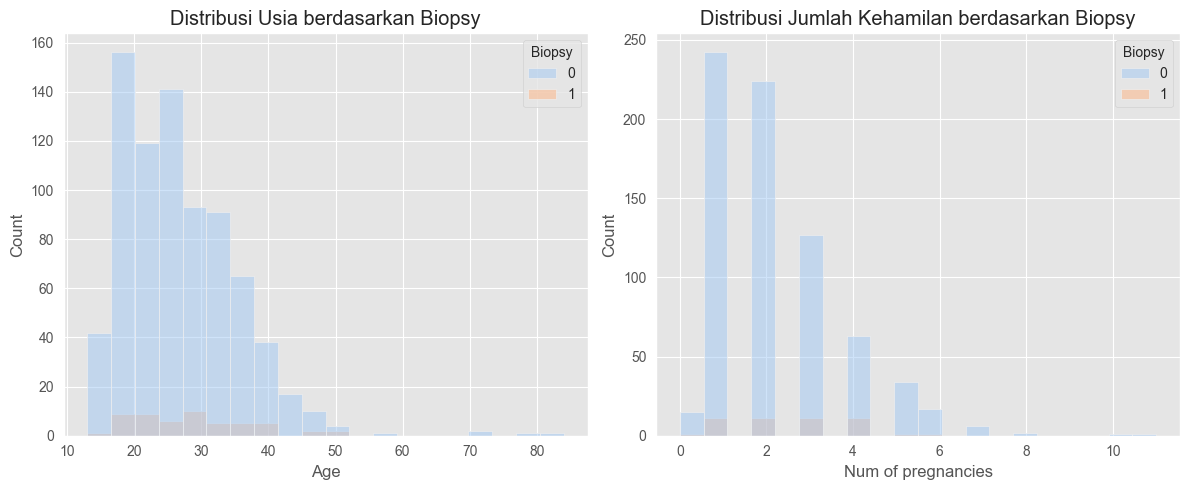

In [2340]:
# Visualisasi Distribusi dengan Perbandingan Biopsy
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=df, x='Age', hue='Biopsy', bins=20, ax=axes[0])
axes[0].set_title('Distribusi Usia berdasarkan Biopsy')
sns.histplot(data=df, x='Num of pregnancies', hue='Biopsy', bins=20, ax=axes[1])
axes[1].set_title('Distribusi Jumlah Kehamilan berdasarkan Biopsy')
plt.tight_layout()
plt.show()

#### 2.3. Explore Data

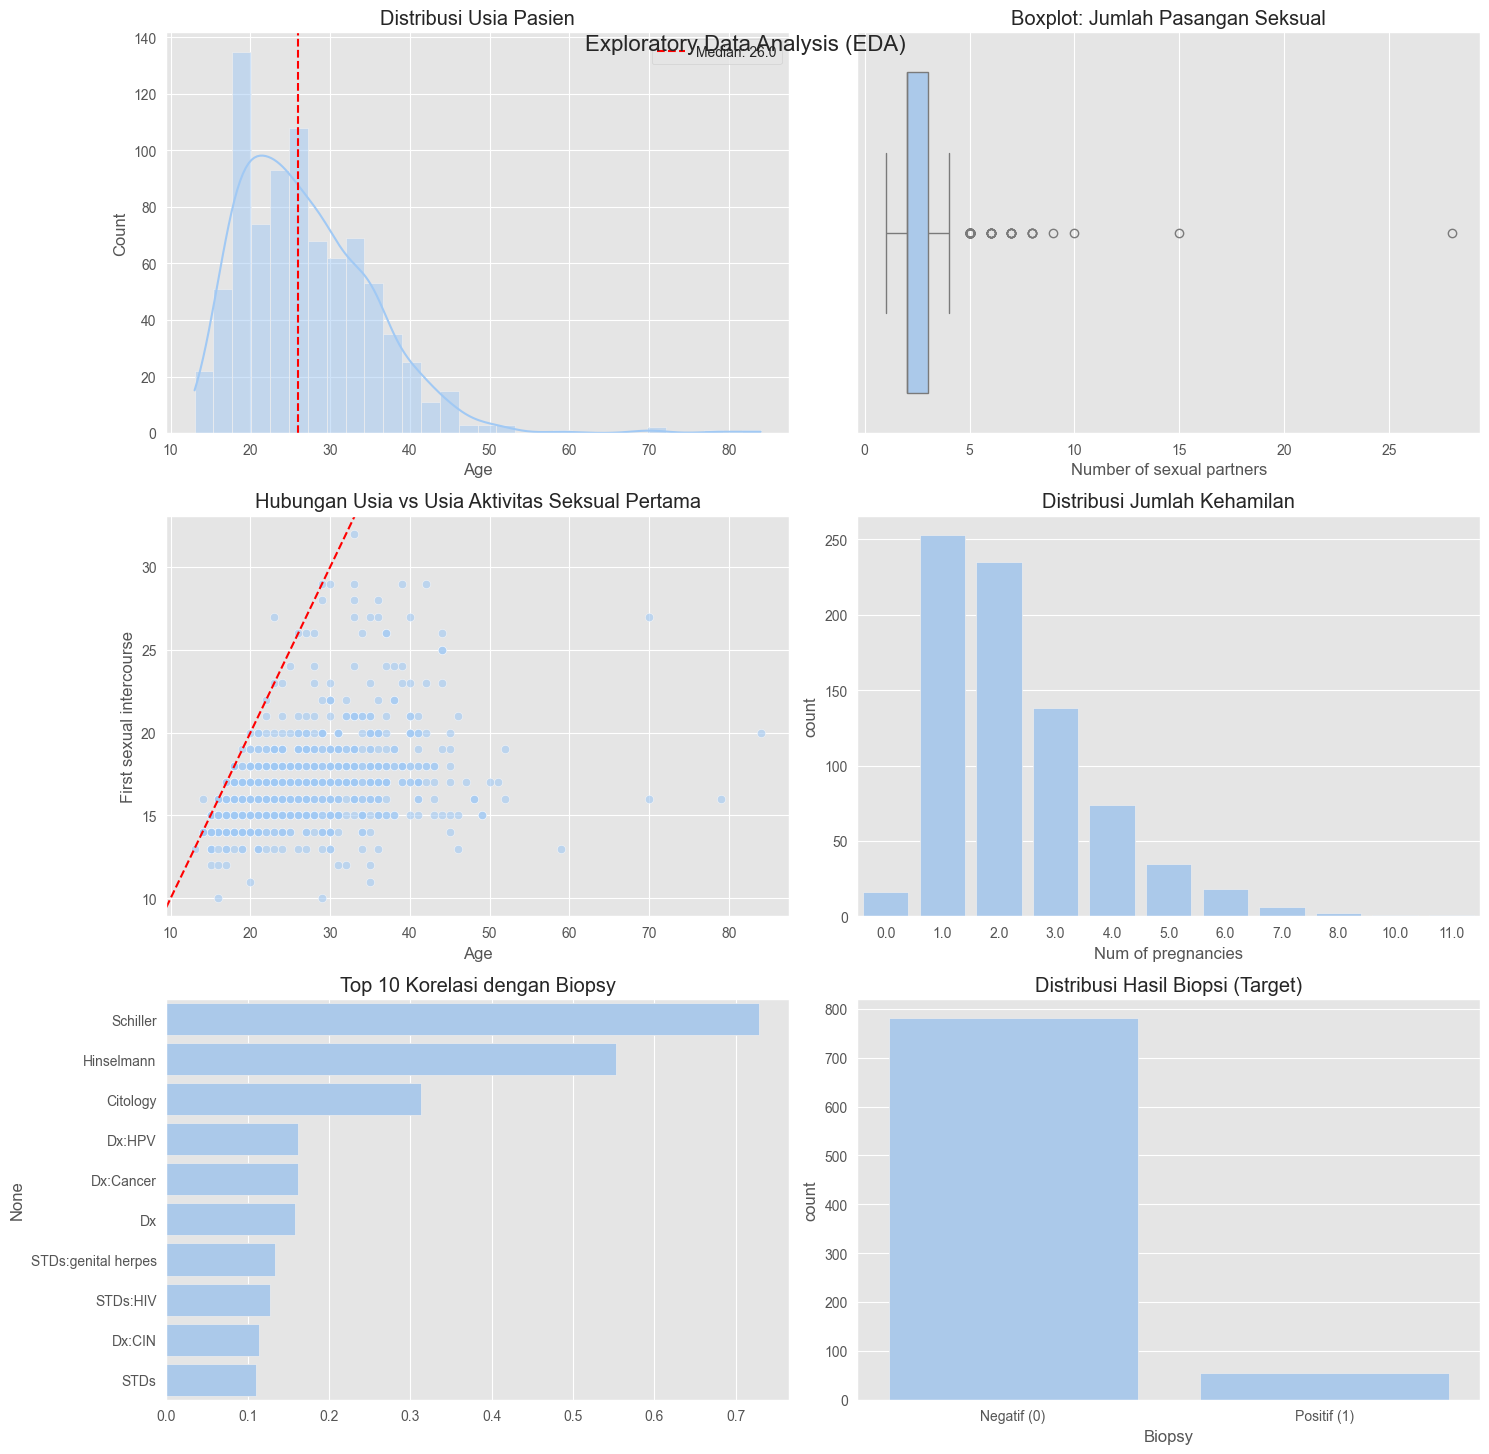

In [2341]:
# Konfigurasi plot
plt.style.use('ggplot')
sns.set_palette('pastel')
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.suptitle('Exploratory Data Analysis (EDA)', fontsize=16, y=0.95)

# Plot 1: Distribusi Usia
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia Pasien')
axes[0, 0].axvline(df['Age'].median(), color='r', linestyle='--', label=f'Median: {df["Age"].median()}')
axes[0, 0].legend()

# Plot 2: Distribusi Jumlah Pasangan Seksual
sns.boxplot(x=df['Number of sexual partners'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot: Jumlah Pasangan Seksual')

# Plot 3: Hubungan Usia vs Aktivitas Seksual Pertama
sns.scatterplot(x='Age', y='First sexual intercourse', data=df, alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Hubungan Usia vs Usia Aktivitas Seksual Pertama')
axes[1, 0].axline((15, 15), slope=1, color='r', linestyle='--')

# Plot 4: Distribusi Kehamilan
sns.countplot(x='Num of pregnancies', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Jumlah Kehamilan')

# Plot 5: Korelasi dengan Target
corr_with_target = df.corr()['Biopsy'].sort_values(ascending=False)[1:11]
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, ax=axes[2, 0])
axes[2, 0].set_title('Top 10 Korelasi dengan Biopsy')

# Plot 6: Distribusi Kelas Target
sns.countplot(x='Biopsy', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Distribusi Hasil Biopsi (Target)')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['Negatif (0)', 'Positif (1)'])

plt.tight_layout()
# plt.savefig('cervical_cancer_eda.png', dpi=300)
plt.show()

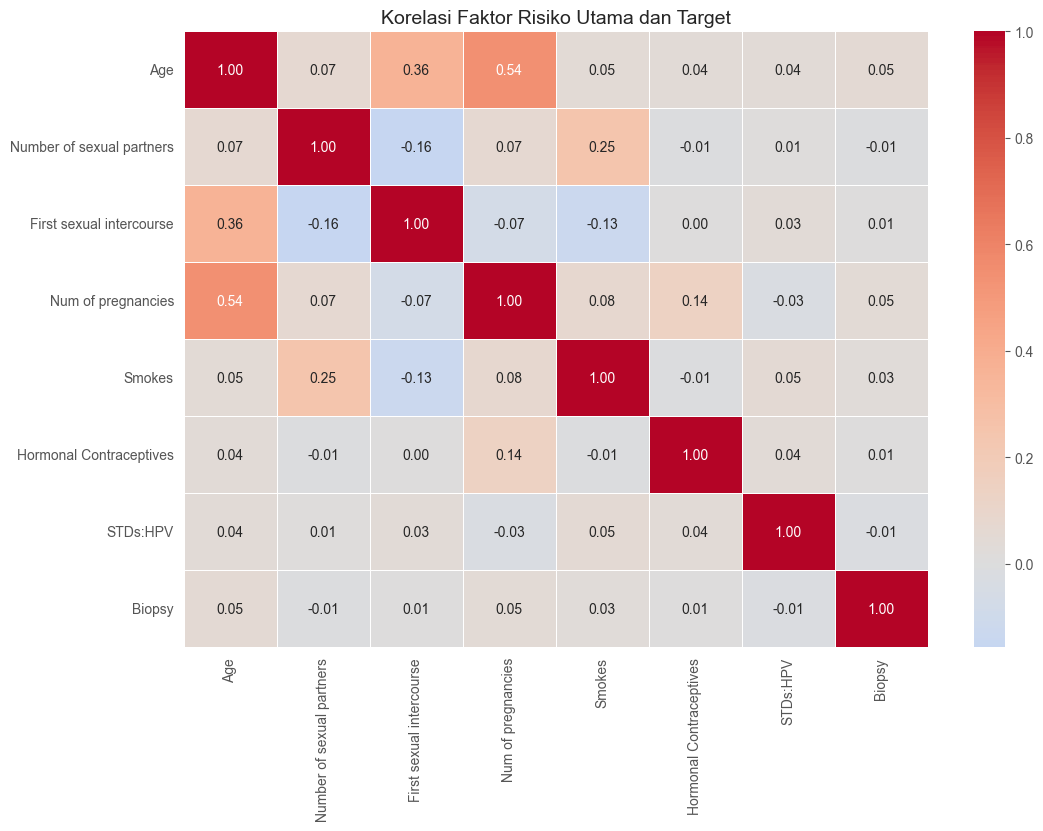

In [2342]:
# Filter hanya fitur yang relevan (hindari leakage)
risk_features = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 
    'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives',
    'STDs:HPV', 'Biopsy'
]

plt.figure(figsize=(12, 8))
corr_matrix = df[risk_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)
plt.title('Korelasi Faktor Risiko Utama dan Target', fontsize=14)
plt.show()

#### 2.4. Verify Data Quality

In [2343]:
# Analisis Missing Values (Fitur Kunci)
# print(f"Jumlah Missing Values per Kolom:\n{df.isnull().sum()}")
print("Analisis Missing Values (Fitur Kunci):")
key_features = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                'Num of pregnancies', 'Smokes', 'Hormonal Contraceptives', 'STDs:HPV']
missing_data = pd.DataFrame({
    'Missing Values': (df[key_features].isnull().sum()),
    'Implikasi': ['Minor', 'Minor, tetapi relevan', 'Minor, tetapi relevan', 
                  'Dapat memengaruhi analisis', 'Minor, tetapi relevan', 
                  'Mengurangi akurasi', 'Kritis, faktor utama'],
    'Penanganan': ['Tidak diperlukan', 'Imputasi median', 'Imputasi median', 
                   'Imputasi median', 'Imputasi modus (0)', 'Imputasi modus (0)', 
                   'Imputasi modus atau hapus baris']
})
display(missing_data[missing_data['Missing Values'] > 0])

Analisis Missing Values (Fitur Kunci):


,Missing Values,Implikasi,Penanganan
Number of sexual partners,25,"Minor, tetapi relevan",Imputasi median
First sexual intercourse,7,"Minor, tetapi relevan",Imputasi median
Num of pregnancies,56,Dapat memengaruhi analisis,Imputasi median
Smokes,13,"Minor, tetapi relevan",Imputasi modus (0)
Hormonal Contraceptives,103,Mengurangi akurasi,Imputasi modus (0)
STDs:HPV,100,"Kritis, faktor utama",Imputasi modus atau hapus baris


In [2344]:
# Analisis Outlier (Fitur Kontinu)
print("Analisis Outlier (Fitur Kontinu):")
outlier_report = pd.DataFrame()

# Define penanganan per fitur
penanganan_map = {
    'Age': 'Pertahankan',
    'Number of sexual partners': 'Validasi medis, capping',
    'First sexual intercourse': 'Pertahankan',
    'Num of pregnancies': 'Pertahankan'
}

for col in ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    outlier_report = pd.concat([outlier_report, pd.DataFrame({
        'Fitur': [col],
        'Jumlah Outlier': [len(outliers)],
        'Persentase': [f"{outlier_pct:.2f}%"],
        'Nilai Maksimum': [df[col].max()],
        'Penanganan': [penanganan_map[col]]
    })], ignore_index=True)

display(outlier_report)

Analisis Outlier (Fitur Kontinu):


,Fitur,Jumlah Outlier,Persentase,Nilai Maksimum,Penanganan
0,Age,11,1.32%,84.0,Pertahankan
1,Number of sexual partners,68,8.14%,28.0,"Validasi medis, capping"
2,First sexual intercourse,41,4.91%,32.0,Pertahankan
3,Num of pregnancies,10,1.20%,11.0,Pertahankan


In [2345]:
# Validasi Konsistensi Logis
print("Validasi Konsistensi Logis:")
inconsistencies = []
age_sex_inconsistent = df[df['First sexual intercourse'] > df['Age']]
if not age_sex_inconsistent.empty:
    inconsistencies.append(f"Usia seks pertama > usia saat ini: {len(age_sex_inconsistent)} kasus. Penanganan: Hapus baris.")
smoke_inconsistent = df[(df['Smokes'] == 0) & (df['Smokes (years)'] > 0)]
if not smoke_inconsistent.empty:
    inconsistencies.append(f"Smokes=0 tapi Smokes (years)>0: {len(smoke_inconsistent)} kasus. Penanganan: Imputasi Smokes=1.")
pregnancy_inconsistent = df[(df['Num of pregnancies'].isna()) & (df['Age'] > 25)]
if not pregnancy_inconsistent.empty:
    inconsistencies.append(f"Data kehamilan hilang untuk usia >25: {len(pregnancy_inconsistent)} kasus. Penanganan: Imputasi median.")
if inconsistencies:
    for issue in inconsistencies:
        print(f"⚠️ {issue}")
else:
    print("✅ Tidak ditemukan inkonsistensi logis utama.")

Validasi Konsistensi Logis:
⚠️ Usia seks pertama > usia saat ini: 2 kasus. Penanganan: Hapus baris.
⚠️ Data kehamilan hilang untuk usia >25: 30 kasus. Penanganan: Imputasi median.


In [2346]:
# Fitur dengan Variansi Nol
print("Fitur dengan Variansi Nol:")
zero_var_cols = [col for col in df.columns if df[col].nunique() == 1]
if zero_var_cols:
    print(f"Ditemukan {len(zero_var_cols)} fitur dengan variansi nol: {zero_var_cols}. Penanganan: Hapus fitur.")
else:
    print("✅ Tidak ditemukan fitur dengan variansi nol di antara fitur kunci.")

# Verifikasi Data Duplikat
print("\nVerifikasi Data Duplikat:")
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Ditemukan {duplicates} baris duplikat. Penanganan: Hapus baris duplikat.")
else:
    print("✅ Tidak ditemukan baris duplikat.")

Fitur dengan Variansi Nol:
Ditemukan 2 fitur dengan variansi nol: ['STDs:cervical condylomatosis', 'STDs:AIDS']. Penanganan: Hapus fitur.

Verifikasi Data Duplikat:
✅ Tidak ditemukan baris duplikat.


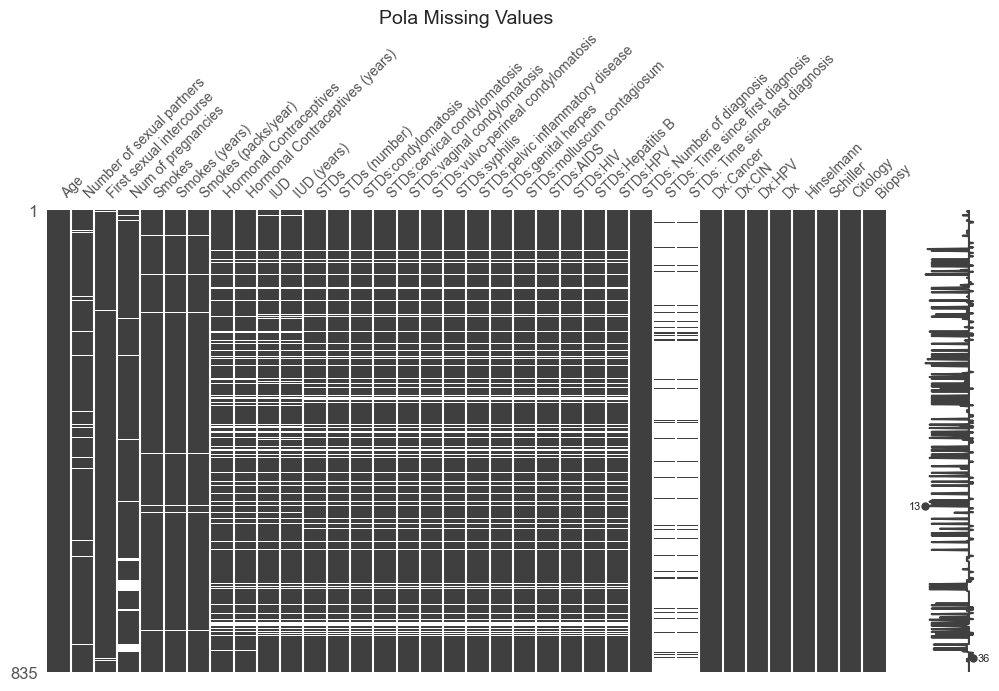

In [2347]:
# Visualisasi Missing Values
msno.matrix(df, figsize=(12, 6), fontsize=10)
plt.title('Pola Missing Values', fontsize=14)
plt.savefig('KK-UAS/img/missing_values_pattern.png', dpi=300)
plt.show()

### 3. Data Preparation

In [2348]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### 3.1. Data Cleaning

In [2349]:
drop_columns = [
  # Alasan: Data hilang ekstrem (>90%)
  'STDs: Time since first diagnosis',
  'STDs: Time since last diagnosis',

  # Alasan: Varians sangat rendah & redundan
  'STDs:condylomatosis',
  'STDs:cervical condylomatosis',
  'STDs:vaginal condylomatosis',
  'STDs:vulvo-perineal condylomatosis',
  'STDs:syphilis',
  'STDs:pelvic inflammatory disease',
  'STDs:genital herpes',
  'STDs:molluscum contagiosum',
  'STDs:AIDS',
  'STDs:HIV',
  'STDs:Hepatitis B',

  # Alasan: Kebocoran data (data leakage)
  'Dx:Cancer',
  'Dx:CIN',
  'Dx:HPV',
  'Dx',
  'Schiller', 'Hinselmann', 'Citology',  # Tambahan: tes diagnostik untuk hindari leakage
  'STDs: Number of diagnosis'  # Redundan
  # 'STDs:HPV', pertahankan data
]
df_clean = df.drop(columns=drop_columns)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              835 non-null    int64  
 1   Number of sexual partners        810 non-null    float64
 2   First sexual intercourse         828 non-null    float64
 3   Num of pregnancies               779 non-null    float64
 4   Smokes                           822 non-null    float64
 5   Smokes (years)                   822 non-null    float64
 6   Smokes (packs/year)              822 non-null    float64
 7   Hormonal Contraceptives          732 non-null    float64
 8   Hormonal Contraceptives (years)  732 non-null    float64
 9   IUD                              723 non-null    float64
 10  IUD (years)                      723 non-null    float64
 11  STDs                             735 non-null    float64
 12  STDs (number)         

In [2350]:
# Verifikasi distribusi Biopsy sebelum pembersihan
print("Distribusi Biopsy (Sebelum Pembersihan):")
print(df_clean['Biopsy'].value_counts())

Distribusi Biopsy (Sebelum Pembersihan):
Biopsy
0    781
1     54
Name: count, dtype: int64


In [2351]:
# 1. Imputasi Missing Values
# Modus untuk fitur biner
binary_cols = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:HPV']
df_clean[binary_cols] = df_clean[binary_cols].fillna(0)

# Median untuk fitur numerik <5% missing
low_missing_cols = ['First sexual intercourse', 'Number of sexual partners', 'Smokes (years)', 'Smokes (packs/year)']
df_clean[low_missing_cols] = df_clean[low_missing_cols].fillna(df_clean[low_missing_cols].median())

# KNNImputer untuk fitur >5% missing
high_missing_cols = ['Num of pregnancies', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']
scaler_temp = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler_temp.fit_transform(df_clean[high_missing_cols]),
    columns=high_missing_cols,
    index=df_clean.index
)
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
df_scaled[high_missing_cols] = imputer.fit_transform(df_scaled[high_missing_cols])
df_clean[high_missing_cols] = scaler_temp.inverse_transform(df_scaled[high_missing_cols])

# Konversi fitur biner ke int64
df_clean[binary_cols] = df_clean[binary_cols].astype('int64')

# 2. Penanganan Outlier (Winsorizing)
def winsorize_column(series, n=3):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - n * iqr
    upper_bound = q3 + n * iqr
    return series.clip(lower_bound, upper_bound)

outlier_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)']
for col in outlier_cols:
    df_clean[col] = winsorize_column(df_clean[col], n=3)

# 3. Perbaikan Inkonsistensi
# Konsistensi merokok
df_clean.loc[df_clean['Smokes (years)'] > 0, 'Smokes'] = 1

# Filter inkonsistensi usia (longgar)
df_clean = df_clean[
    (df_clean['First sexual intercourse'] >= 10) & 
    (df_clean['First sexual intercourse'] <= df_clean['Age'])
]

# Tambahkan flag inkonsistensi ringan
df_clean['Age_Sex_Inconsistency'] = np.where(
    df_clean['First sexual intercourse'] > df_clean['Age'], 1, 0
)

# 4. Penghapusan Duplikat
# Cek duplikat penuh
duplicates_full = df_clean.duplicated().sum()
if duplicates_full > 0:
    print(f"Menghapus {duplicates_full} baris duplikat penuh.")
    df_clean = df_clean.drop_duplicates()

Menghapus 7 baris duplikat penuh.


In [2352]:
# Cek duplikat berdasarkan fitur kunci
key_subset = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Biopsy']
duplicates = df_clean[df_clean.duplicated(subset=key_subset, keep=False)]
if not duplicates.empty:
    print(f"Analisis Duplikat Subset ({len(duplicates)} baris):")
    print("STDs:HPV:", duplicates['STDs:HPV'].value_counts())
    print("Smokes:", duplicates['Smokes'].value_counts())
    print("Hormonal Contraceptives:", duplicates['Hormonal Contraceptives'].value_counts())
    print(f"⚠️ {df_clean.duplicated(subset=key_subset).sum()} duplikat subset dihapus.")
    df_clean = df_clean.drop_duplicates(subset=key_subset)

Analisis Duplikat Subset (201 baris):
STDs:HPV: STDs:HPV
0    201
Name: count, dtype: int64
Smokes: Smokes
0    177
1     24
Name: count, dtype: int64
Hormonal Contraceptives: Hormonal Contraceptives
1    114
0     87
Name: count, dtype: int64
⚠️ 114 duplikat subset dihapus.


In [ ]:
# Verifikasi distribusi Biopsy setelah pembersihan
print("Distribusi Biopsy (Setelah Pembersihan):")
print(df_clean['Biopsy'].value_counts())


Distribusi Biopsy (Setelah Pembersihan):
Biopsy
0    659
1     53
Name: count, dtype: int64


#### 3.2 Data Transformation

In [2354]:
# Feature Engineering
df_clean['UnderageIntercourse'] = (df_clean['First sexual intercourse'] < 18).astype(int)
df_clean['Parity_Risk'] = df_clean['Num of pregnancies'] * (df_clean['Age'] - df_clean['First sexual intercourse'])
df_clean['STDs_HPV_Kontrasepsi'] = df_clean['STDs:HPV'] * df_clean['Hormonal Contraceptives']

In [2355]:
# Kategorisasi untuk Naive Bayes
def categorize_age(age):
    if age < 25: return 'Muda'
    elif age <= 40: return 'Dewasa'
    else: return 'Tua'

def categorize_partners(partners):
    if partners <= 2: return 'Sedikit'
    elif partners <= 10: return 'Sedang'
    else: return 'Banyak'

def categorize_intercourse(age):
    if age <= 16: return 'Sangat Muda'
    elif age <= 20: return 'Muda'
    else: return 'Dewasa'

def categorize_pregnancies(num):
    if num <= 1: return 'Rendah'
    elif num <= 4: return 'Sedang'
    else: return 'Tinggi'

df_clean['Age_Cat'] = df_clean['Age'].apply(categorize_age)
df_clean['Partners_Cat'] = df_clean['Number of sexual partners'].apply(categorize_partners)
df_clean['Intercourse_Cat'] = df_clean['First sexual intercourse'].apply(categorize_intercourse)
df_clean['Pregnancies_Cat'] = df_clean['Num of pregnancies'].apply(categorize_pregnancies)

In [2356]:
# Normalisasi untuk ANN (kecualikan fitur biner)
numerical_cols = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 
    'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'Parity_Risk'
]
scaler = MinMaxScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [2357]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 834
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              712 non-null    float64
 1   Number of sexual partners        712 non-null    float64
 2   First sexual intercourse         712 non-null    float64
 3   Num of pregnancies               712 non-null    float64
 4   Smokes                           712 non-null    int64  
 5   Smokes (years)                   712 non-null    float64
 6   Smokes (packs/year)              712 non-null    float64
 7   Hormonal Contraceptives          712 non-null    int64  
 8   Hormonal Contraceptives (years)  712 non-null    float64
 9   IUD                              712 non-null    int64  
 10  IUD (years)                      712 non-null    float64
 11  STDs                             712 non-null    int64  
 12  STDs (number)              

#### 3.3 Data Integration

Tidak diperlukan karena dataset dari sumber tunggal.

#### 3.4 Data Reduction

In [2358]:
# Seleksi fitur untuk Naive Bayes
nb_columns = [
    'Age_Cat', 'Partners_Cat', 'Intercourse_Cat', 'Pregnancies_Cat',
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:HPV',
    # 'Age_Sex_Inconsistency',
    'UnderageIntercourse', 'STDs_HPV_Kontrasepsi', 'Biopsy'
]

# Seleksi fitur untuk ANN
ann_columns = [
    'Age', 'Number of sexual partners', 'First sexual intercourse',
    'Num of pregnancies', 'Smokes', 'Smokes (packs/year)',
    # 'Smokes (years)', 'Age_Sex_Inconsistency',
    'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)',
    'STDs', 'STDs (number)', 'STDs:HPV', 'Parity_Risk', 'UnderageIntercourse', 
    'STDs_HPV_Kontrasepsi', 'Biopsy'
]

# Buat dataset khusus model
df_nb = df_clean[nb_columns].copy()
df_ann = df_clean[ann_columns].copy()

In [2359]:
# Validasi distribusi fitur
print("Distribusi Fitur Kategorikal (Naive Bayes):")
for col in ['Age_Cat', 'Partners_Cat', 'Intercourse_Cat', 'Pregnancies_Cat']:
    print(f"\n{col}:")
    print(df_nb[col].value_counts())

Distribusi Fitur Kategorikal (Naive Bayes):

Age_Cat:
Age_Cat
Dewasa    371
Muda      288
Tua        53
Name: count, dtype: int64

Partners_Cat:
Partners_Cat
Sedikit    384
Sedang     328
Name: count, dtype: int64

Intercourse_Cat:
Intercourse_Cat
Muda           327
Sangat Muda    319
Dewasa          66
Name: count, dtype: int64

Pregnancies_Cat:
Pregnancies_Cat
Sedang    441
Rendah    210
Tinggi     61
Name: count, dtype: int64


In [2360]:
print("Statistik Fitur Numerik Setelah Winsorizing (ANN):")
display(df_ann[['Number of sexual partners', 'Num of pregnancies']].describe())

# Validasi fitur baru
print("\nKorelasi Fitur Baru dengan Biopsy (ANN):")
print(df_ann[['Parity_Risk', 'UnderageIntercourse', 'STDs_HPV_Kontrasepsi', 'Biopsy']].corr()['Biopsy'])

Statistik Fitur Numerik Setelah Winsorizing (ANN):


,Number of sexual partners,Num of pregnancies
count,712.000000,712.000000
mean,0.311236,0.263799
std,0.257189,0.159766
min,0.000000,0.000000
25%,0.200000,0.111111
50%,0.200000,0.222222
75%,0.400000,0.333333
max,1.000000,1.000000



Korelasi Fitur Baru dengan Biopsy (ANN):
Parity_Risk             0.032930
UnderageIntercourse    -0.016612
STDs_HPV_Kontrasepsi   -0.015052
Biopsy                  1.000000
Name: Biopsy, dtype: float64


#### 3.5 Data Splitting

In [2361]:
# Pemisahan dataset untuk Naive Bayes
X_nb = df_nb.drop('Biopsy', axis=1)
y_nb = df_nb['Biopsy']
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# Pemisahan dataset untuk ANN
X_ann = df_ann.drop('Biopsy', axis=1)
y_ann = df_ann['Biopsy']
X_ann_train, X_ann_test, y_ann_train, y_ann_test = train_test_split(
    X_ann, y_ann, test_size=0.2, random_state=42, stratify=y_ann
)

In [2362]:
# Validasi distribusi Biopsy setelah splitting
print("Distribusi Biopsy (Training Naive Bayes):")
print(y_nb_train.value_counts())
print("\nDistribusi Biopsy (Testing Naive Bayes):")
print(y_nb_test.value_counts())

Distribusi Biopsy (Training Naive Bayes):
Biopsy
0    527
1     42
Name: count, dtype: int64

Distribusi Biopsy (Testing Naive Bayes):
Biopsy
0    132
1     11
Name: count, dtype: int64


In [2363]:
print("Distribusi Biopsy (Training ANN):")
print(y_ann_train.value_counts())
print("\nDistribusi Biopsy (Testing ANN):")
print(y_ann_test.value_counts())

Distribusi Biopsy (Training ANN):
Biopsy
0    527
1     42
Name: count, dtype: int64

Distribusi Biopsy (Testing ANN):
Biopsy
0    132
1     11
Name: count, dtype: int64


#### 3.6 Data Formatting

In [2364]:
# One-hot encoding untuk fitur kategorikal (Naive Bayes)
X_nb_train = pd.get_dummies(X_nb_train, columns=['Age_Cat', 'Partners_Cat', 'Intercourse_Cat', 'Pregnancies_Cat'])
X_nb_test = pd.get_dummies(X_nb_test, columns=['Age_Cat', 'Partners_Cat', 'Intercourse_Cat', 'Pregnancies_Cat'])

# Pastikan kolom konsisten antara train dan test
X_nb_test = X_nb_test.reindex(columns=X_nb_train.columns, fill_value=0)

# Penanganan class imbalance dengan SMOTE (hanya pada training set)
smote = SMOTE(random_state=42)
X_nb_train_smote, y_nb_train_smote = smote.fit_resample(X_nb_train, y_nb_train)
X_ann_train_smote, y_ann_train_smote = smote.fit_resample(X_ann_train, y_ann_train)

In [2365]:
# Validasi distribusi Biopsy setelah SMOTE
print("Distribusi Biopsy (Training Naive Bayes setelah SMOTE):")
print(pd.Series(y_nb_train_smote).value_counts())

print("\nDistribusi Biopsy (Training ANN setelah SMOTE):")
print(pd.Series(y_ann_train_smote).value_counts())

Distribusi Biopsy (Training Naive Bayes setelah SMOTE):
Biopsy
0    527
1    527
Name: count, dtype: int64

Distribusi Biopsy (Training ANN setelah SMOTE):
Biopsy
0    527
1    527
Name: count, dtype: int64


In [2366]:
# Simpan dataset
df_nb_train = pd.concat([X_nb_train_smote, y_nb_train_smote.rename('Biopsy')], axis=1)
df_nb_test = pd.concat([X_nb_test, y_nb_test.rename('Biopsy')], axis=1)
df_ann_train = pd.concat([X_ann_train_smote, y_ann_train_smote.rename('Biopsy')], axis=1)
df_ann_test = pd.concat([X_ann_test, y_ann_test.rename('Biopsy')], axis=1)

df_nb_train.to_csv('data/cervical_cancer_nb_train.csv', index=False)
df_nb_test.to_csv('data/cervical_cancer_nb_test.csv', index=False)
df_ann_train.to_csv('data/cervical_cancer_ann_train.csv', index=False)
df_ann_test.to_csv('data/cervical_cancer_ann_test.csv', index=False)

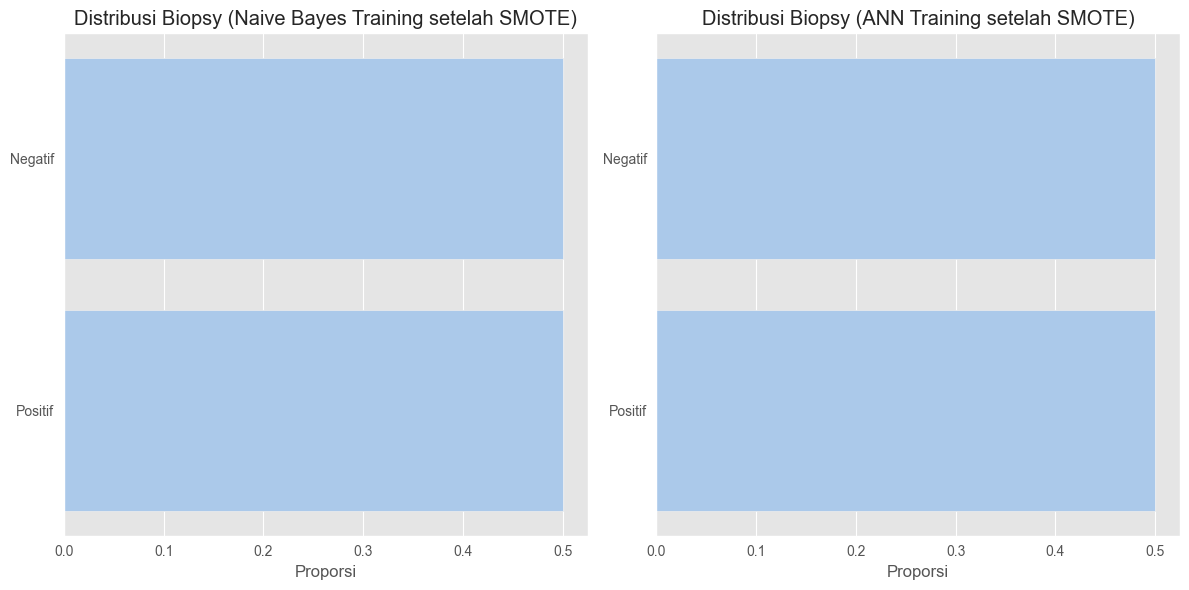

In [2367]:
# Visualisasi distribusi Biopsy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=pd.Series(y_nb_train_smote).value_counts(normalize=True), y=['Negatif', 'Positif'])
plt.title('Distribusi Biopsy (Naive Bayes Training setelah SMOTE)')
plt.xlabel('Proporsi')

plt.subplot(1, 2, 2)
sns.barplot(x=pd.Series(y_ann_train_smote).value_counts(normalize=True), y=['Negatif', 'Positif'])
plt.title('Distribusi Biopsy (ANN Training setelah SMOTE)')
plt.xlabel('Proporsi')
plt.tight_layout()
plt.show()

### 4. Modeling

In [2368]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, f1_score, roc_auc_score, confusion_matrix, classification_report
import tensorflow as tf
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

#### 4.1. Modeling Techniques

In [2369]:
# Load dataset hasil Data Preparation
nb_train = pd.read_csv('data/cervical_cancer_nb_train.csv')
nb_test = pd.read_csv('data/cervical_cancer_nb_test.csv')
ann_train = pd.read_csv('data/cervical_cancer_ann_train.csv')
ann_test = pd.read_csv('data/cervical_cancer_ann_test.csv')

# Validasi dataset
print("Validasi Dataset:")
print(f"Naive Bayes Train: {nb_train.shape}, Missing: {nb_train.isnull().sum().sum()}")
print(f"Naive Bayes Test: {nb_test.shape}, Missing: {nb_test.isnull().sum().sum()}")
print(f"ANN Train: {ann_train.shape}, Missing: {ann_train.isnull().sum().sum()}")
print(f"ANN Test: {ann_test.shape}, Missing: {ann_test.isnull().sum().sum()}")


Validasi Dataset:
Naive Bayes Train: (1054, 19), Missing: 0
Naive Bayes Test: (143, 19), Missing: 0
ANN Train: (1054, 17), Missing: 0
ANN Test: (143, 17), Missing: 0


In [2370]:
# Pisahkan fitur dan target
X_nb_train = nb_train.drop('Biopsy', axis=1)
y_nb_train = nb_train['Biopsy']
X_nb_test = nb_test.drop('Biopsy', axis=1)
y_nb_test = nb_test['Biopsy']

X_ann_train = ann_train.drop('Biopsy', axis=1)
y_ann_train = ann_train['Biopsy']
X_ann_test = ann_test.drop('Biopsy', axis=1)
y_ann_test = ann_test['Biopsy']

# Konversi ke NumPy untuk ANN
X_ann_train = X_ann_train.to_numpy()
X_ann_test = X_ann_test.to_numpy()
y_ann_train = y_ann_train.to_numpy()
y_ann_test = y_ann_test.to_numpy()

# Hitung bobot kelas untuk ANN
class_weights = {0: (len(y_ann_train) / (2 * np.sum(y_ann_train == 0))), 
                 1: (len(y_ann_train) / (2 * np.sum(y_ann_train == 1)))}

#### 4.2. Build Models

##### 4.2.1. Naive Bayes

In [2371]:
nb_model = ComplementNB()
nb_model.fit(X_nb_train, y_nb_train)

# Prediksi awal
y_nb_pred = nb_model.predict(X_nb_test)
nb_f1_initial = f1_score(y_nb_test, y_nb_pred)
nb_roc_initial = roc_auc_score(y_nb_test, nb_model.predict_proba(X_nb_test)[:, 1])
print("Naive Bayes (Initial Model):")
print(f"F1-Score: {nb_f1_initial:.4f}")
print(f"ROC-AUC: {nb_roc_initial:.4f}")

# Simpan model awal
joblib.dump(nb_model, 'KK-UAS/models/nb_initial_model.pkl')

Naive Bayes (Initial Model):
F1-Score: 0.1772
ROC-AUC: 0.5978


['KK-UAS/models/nb_initial_model.pkl']

##### 4.2.2. Artificial Neural Network

In [2372]:
def create_ann_model(units1, units2, dropout, lr, input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(units1, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout),
        Dense(units2, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Arsitektur awal
input_shape = X_ann_train.shape[1]
ann_model = create_ann_model(units1=64, units2=32, dropout=0.3, lr=0.001, input_shape=input_shape)

# Training model
history = ann_model.fit(
    X_ann_train, y_ann_train,
    epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights, verbose=0
)

# Prediksi awal dengan threshold 0.3 untuk meningkatkan recall
y_ann_pred_proba = ann_model.predict(X_ann_test, verbose=0)
y_ann_pred = (y_ann_pred_proba > 0.3).astype(int)  # Lower threshold
ann_f1_initial = f1_score(y_ann_test, y_ann_pred)
ann_roc_initial = roc_auc_score(y_ann_test, y_ann_pred_proba)
print("ANN (Initial Model):")
print(f"F1-Score: {ann_f1_initial:.4f}")
print(f"ROC-AUC: {ann_roc_initial:.4f}")

# Simpan model awal
ann_model.save('KK-UAS/models/ann_initial_model.keras')

ANN (Initial Model):
F1-Score: 0.1250
ROC-AUC: 0.4112


#### 4.3. Tune Models

##### 4.3.1. Naive Bayes

In [2373]:
nb_param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
nb_grid = GridSearchCV(ComplementNB(), nb_param_grid, cv=5, scoring='f1', n_jobs=-1)
nb_grid.fit(X_nb_train, y_nb_train)

nb_tuned_model = nb_grid.best_estimator_
print("Naive Bayes (Tuned Model):")
print(f"Best Parameters: {nb_grid.best_params_}")
y_nb_tuned_pred = nb_tuned_model.predict(X_nb_test)
nb_f1_tuned = f1_score(y_nb_test, y_nb_tuned_pred)
nb_roc_tuned = roc_auc_score(y_nb_test, nb_tuned_model.predict_proba(X_nb_test)[:, 1])
print(f"F1-Score: {nb_f1_tuned:.4f}")
print(f"ROC-AUC: {nb_roc_tuned:.4f}")

# Simpan model tuned
joblib.dump(nb_tuned_model, 'KK-UAS/models/nb_tuned_model.pkl')

Naive Bayes (Tuned Model):
Best Parameters: {'alpha': 0.5}
F1-Score: 0.1772
ROC-AUC: 0.5971


['KK-UAS/models/nb_tuned_model.pkl']

##### 4.3.2. Artificial Neural Network

In [2374]:
ann_configs = [
    {'units1': 64, 'units2': 32, 'dropout': 0.3, 'lr': 0.001},
    {'units1': 128, 'units2': 64, 'dropout': 0.4, 'lr': 0.0005},
    {'units1': 32, 'units2': 16, 'dropout': 0.2, 'lr': 0.001},
    {'units1': 64, 'units2': 16, 'dropout': 0.3, 'lr': 0.0001}
]

best_ann_f1 = 0
best_ann_model = None
best_config = None

for config in ann_configs:
    model = create_ann_model(
        units1=config['units1'], units2=config['units2'], 
        dropout=config['dropout'], lr=config['lr'], input_shape=input_shape
    )
    model.fit(
        X_ann_train, y_ann_train,
        epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights, verbose=0
    )
    
    y_pred_proba = model.predict(X_ann_test, verbose=0)
    y_pred = (y_pred_proba > 0.3).astype(int)  # Lower threshold
    f1 = f1_score(y_ann_test, y_pred)
    
    if f1 > best_ann_f1:
        best_ann_f1 = f1
        best_ann_model = model
        best_config = config

# Evaluasi model terbaik
y_ann_tuned_pred_proba = best_ann_model.predict(X_ann_test, verbose=0)
y_ann_tuned_pred = (y_ann_tuned_pred_proba > 0.3).astype(int)  # Lower threshold
ann_f1_tuned = f1_score(y_ann_test, y_ann_tuned_pred)
ann_roc_tuned = roc_auc_score(y_ann_test, y_ann_tuned_pred_proba)
print("ANN (Tuned Model):")
print(f"Best Configuration: {best_config}")
print(f"F1-Score: {ann_f1_tuned:.4f}")
print(f"ROC-AUC: {ann_roc_tuned:.4f}")

# Simpan model tuned
best_ann_model.save('KK-UAS/models/ann_tuned_model.keras')

ANN (Tuned Model):
Best Configuration: {'units1': 64, 'units2': 16, 'dropout': 0.3, 'lr': 0.0001}
F1-Score: 0.1481
ROC-AUC: 0.5434


#### 4.4. Validate Models

##### 4.4.1. Naive Bayes

In [2375]:
print("Validasi Naive Bayes (Tuned Model):")
nb_report = classification_report(y_nb_test, y_nb_tuned_pred, output_dict=True)
print(classification_report(y_nb_test, y_nb_tuned_pred))
nb_cm = confusion_matrix(y_nb_test, y_nb_tuned_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('KK-UAS/img/nb_confusion_matrix.png')
plt.close()

# ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_nb_test, nb_tuned_model.predict_proba(X_nb_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(nb_fpr, nb_tpr, label=f'ROC-AUC: {nb_roc_tuned:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Naive Bayes')
plt.legend()
plt.savefig('KK-UAS/img/nb_roc_curve.png')
plt.close()

# Distribusi probabilitas prediksi
plt.figure(figsize=(6, 4))
sns.histplot(nb_tuned_model.predict_proba(X_nb_test)[:, 1], kde=True, bins=32)
plt.title('Distribusi Probabilitas Prediksi Naive Bayes (Test Set)')
plt.xlabel('Probabilitas Biopsy=1')
plt.savefig('KK-UAS/img/nb_proba_distribution.png')
plt.close()


Validasi Naive Bayes (Tuned Model):
              precision    recall  f1-score   support

           0       0.95      0.54      0.69       132
           1       0.10      0.64      0.18        11

    accuracy                           0.55       143
   macro avg       0.52      0.59      0.43       143
weighted avg       0.88      0.55      0.65       143



##### 4.4.2. Artificial Neural Network

In [2376]:
print("Validasi ANN (Tuned Model):")
ann_report = classification_report(y_ann_test, y_ann_tuned_pred, output_dict=True)
print(classification_report(y_ann_test, y_ann_tuned_pred))
ann_cm = confusion_matrix(y_ann_test, y_ann_tuned_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ANN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('KK-UAS/img/ann_confusion_matrix.png')
plt.close()

# ROC Curve
ann_fpr, ann_tpr, _ = roc_curve(y_ann_test, y_ann_tuned_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(ann_fpr, ann_tpr, label=f'ROC-AUC: {ann_roc_tuned:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ANN')
plt.legend()
plt.savefig('KK-UAS/img/ann_roc_curve.png')
plt.close()

# Distribusi probabilitas prediksi
plt.figure(figsize=(6, 4))
sns.histplot(y_ann_tuned_pred_proba.flatten(), kde=True)
plt.title('Distribusi Probabilitas Prediksi ANN (Test Set)')
plt.xlabel('Probabilitas Biopsy=1')
plt.savefig('KK-UAS/img/ann_proba_distribution.png')
plt.close()


Validasi ANN (Tuned Model):
              precision    recall  f1-score   support

           0       0.95      0.14      0.24       132
           1       0.08      0.91      0.15        11

    accuracy                           0.20       143
   macro avg       0.51      0.52      0.19       143
weighted avg       0.88      0.20      0.23       143



In [2377]:
# Simpan laporan performa
report_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'ANN'],
    'F1-Score': [nb_f1_tuned, ann_f1_tuned],
    'ROC-AUC': [nb_roc_tuned, ann_roc_tuned],
    'Precision_0': [nb_report['0']['precision'], ann_report['0']['precision']],
    'Recall_0': [nb_report['0']['recall'], ann_report['0']['recall']],
    'Precision_1': [nb_report['1']['precision'], ann_report['1']['precision']],
    'Recall_1': [nb_report['1']['recall'], ann_report['1']['recall']]
})
report_df.to_csv('KK-UAS/models/reports/model_performance.csv', index=False)

# Ringkasan Performa
print("Ringkasan Performa Model:")
print(f"Naive Bayes - F1-Score: {nb_f1_tuned:.4f}, ROC-AUC: {nb_roc_tuned:.4f}")
print(f"ANN - F1-Score: {ann_f1_tuned:.4f}, ROC-AUC: {ann_roc_tuned:.4f}")

Ringkasan Performa Model:
Naive Bayes - F1-Score: 0.1772, ROC-AUC: 0.5971
ANN - F1-Score: 0.1481, ROC-AUC: 0.5434


### 5. Evaluation

### 6. Deployment